In [ ]:
import pandas as pd
import numpy
import requests
import yfinance
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
print("All good 🚀")

All good 🚀


### Question 1. S&P 500 Stocks Added to the Index <br>
Which year had the highest number of additions? Using the list of S&P 500 companies from Wikipedia's S&P 500 companies page, download the data including the year each company was added to the index.

In [142]:
import pandas as pd
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
response = requests.get(url)
print(f"The data can't be retrieved due to {response} error")

The data can't be retrieved due to <Response [403]> error


### Question 2. Indexes YTD (as of 1 Dec 2025) <br>
How many indexes (out of 10) have better year-to-date returns than the US (S&P 500) as of Dec 1, 2025?

In [143]:
import yfinance as yf
from datetime import datetime

In [144]:
indices = {
    "^GSPC": "S&P 500 (US)",
    "000001.SS": "Shanghai Composite (China)",
    "^HSI": "Hang Seng (Hong Kong)",
    "^AXJO": "ASX 200 (Australia)",
    "^NSEI": "Nifty 50 (India)",
    "^GSPTSE": "S&P/TSX (Canada)",
    "^GDAXI": "DAX (Germany)",
    "^FTSE": "FTSE 100 (UK)",
    "^N225": "Nikkei 225 (Japan)",
    "^MXX": "IPC (Mexico)",
    "^BVSP": "Ibovespa (Brazil)"
}
start = "2025-01-01"
end = "2025-12-01"
df = []
for x in indices:
    ticks = yf.Ticker(x)
    data = ticks.history(start=start,end=end, interval ="1d")

    if data.empty:
        print(f"No data for {x}")
    data["Ticker"] = x
    df.append(data)
df = pd.concat(df) 

In [145]:
df.sort_index(ascending=True,inplace=True)
df.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2025-01-01 00:00:00+05:30,23637.650391,23822.800781,23562.800781,23742.900391,154900,0.0,0.0,^NSEI
2025-01-02 00:00:00+11:00,8159.100098,8204.200195,8146.600098,8201.200195,304400,0.0,0.0,^AXJO


In [146]:
x = df.groupby("Ticker")["Close"].first().reset_index()
x.rename(columns={"Close":"first_close"},inplace=True)
y = df.groupby("Ticker")["Close"].last().reset_index()
y.rename(columns={"Close":"last_close"},inplace=True)

In [147]:
returns = x.merge(y,on = "Ticker",how="inner")
returns["growth"] = returns["last_close"]/returns["first_close"]
w = returns[returns["Ticker"]=="^GSPC"]["growth"].item()
outperformers = returns[returns["growth"] > w].shape[0]
returns.set_index("Ticker",inplace=True)
print(f'{outperformers} tickers')

8 tickers


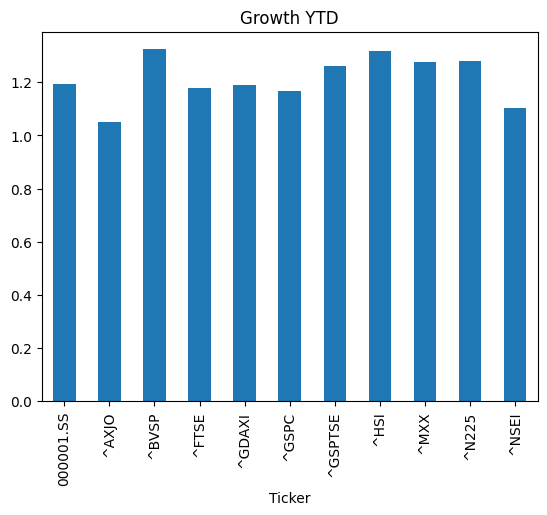

In [148]:
returns["growth"].plot(kind="bar",title="Growth YTD");

In [149]:
returns["growth"]

Ticker
000001.SS    1.191885
^AXJO        1.050346
^BVSP        1.324221
^FTSE        1.176802
^GDAXI       1.190372
^GSPC        1.167084
^GSPTSE      1.260455
^HSI         1.317763
^MXX         1.277937
^N225        1.278496
^NSEI        1.103612
Name: growth, dtype: float64

### Question 3. S&P 500 Market Corrections Analysis <br>
Calculate the median duration (in days) of significant market corrections in the S&P 500 index?

In [177]:
end = "1950-01-01"
ticker = "^GSPC"

tick = yf.Ticker(ticker)
data = tick.history(start=end,interval="1d")
data.index = pd.to_datetime(data.index,errors="coerce")
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03 00:00:00-05:00,16.66,16.66,16.66,16.66,1260000,0.0,0.0
1950-01-04 00:00:00-05:00,16.85,16.85,16.85,16.85,1890000,0.0,0.0
1950-01-05 00:00:00-05:00,16.93,16.93,16.93,16.93,2550000,0.0,0.0
1950-01-06 00:00:00-05:00,16.98,16.98,16.98,16.98,2010000,0.0,0.0
1950-01-09 00:00:00-05:00,17.08,17.08,17.08,17.08,2520000,0.0,0.0
